#### 네이버 뉴스 키워드 [심야 택시] / 기간 2022.06.03 ~ 2022.07.23

In [15]:
# 네이버 뉴스 살해 징역 검색 >> 2022/1월

# 라이브러리
import requests
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd
import requests
import openpyxl
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager


# 웹드라이버 설정
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)


news_df = pd.DataFrame()

while True:
    try:

        url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%8B%AC%EC%95%BC%20%ED%83%9D%EC%8B%9C&sort=0&photo=0&field=0&pd=3&ds=2022.06.03&de=2022.07.23&cluster_rank=36&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from20220603to20220723,a:all&'
        headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

       
        
        for i in range(0, 100):
            response = requests.get(url, headers=headers, params = {'start' : 1+10*i})
            soup = BeautifulSoup(response.text, 'lxml')


            news_title = [title['title'] for title in soup.find_all('a', attrs={'class':'news_tit'})]
            news_url = [url['href'] for url in soup.find_all('a',attrs={'class':'news_tit'})]
            dates = [date.get_text() for date in soup.find_all('span', attrs={'class':'info'})]

            news_date = []
            for date in dates:
                if re.search(r'\d+.\d+.\d+',date) !=None:
                    news_date.append(date)

            new_df = set(news_title)        

            df = pd.DataFrame({'date':news_date,'title':news_title, 'url':news_url})
            news_df  = pd.concat([news_df, df], ignore_index=True)
            #start += 10

    except:
        print('crawling done')
        break


crawling done


In [16]:
news_df_1 = news_df.copy()
news_df_1

,date,title,url
0,2022.07.21.,"""경기도는 심야택시 10만원에 더블?…차라리 호텔을 잡지""",https://www.news1.kr/articles/?4748442
1,2022.07.23.,"""택시 자체가 안 보여요""…경기도도 심야 택시잡기 '전쟁'",https://www.yna.co.kr/view/AKR2022072212930006...
2,2022.07.22.,"與 성일종, 심야 택시난 없앨 ‘탄력요금제’에 “정부 적극 지원해주길”",https://biz.chosun.com/policy/politics/2022/07...
3,2022.07.21.,못 타도 100% 결제?…대형·고급 택시 수수료 ‘플랫폼 마음대로’,https://news.kbs.co.kr/news/view.do?ncd=551474...
4,2022.07.22.,"""택시 호출 취소하니 5만원 결제?""…수수료 폭탄에 소비자들 '분노'",http://mbn.mk.co.kr/pages/news/newsView.php?ca...
...,...,...,...
13949,2022.06.14.,"범죄도시 뺨치네…경찰 검문에 총 쐈다, 필리핀 총격전 전말",https://www.joongang.co.kr/article/25078990
13950,2022.06.13.,고용시장도 '일상 회복'…제조·숙박음식 일자리 훈풍,http://www.newspim.com/news/view/20220613000107
13951,2022.06.16.,"기득권·포지티브·소극행정 '규제의 덫'…美보다 센 완화책 필요[테크전쟁, 선진국의 탄생]",https://view.asiae.co.kr/article/2022061514431...
13952,2022.06.14.,비틀비틀… 음주 자전거·킥보드 운전 늘었다,https://www.cctoday.co.kr/news/articleView.htm...


In [17]:
news_df_1.head(30)

,date,title,url
0,2022.07.21.,"""경기도는 심야택시 10만원에 더블?…차라리 호텔을 잡지""",https://www.news1.kr/articles/?4748442
1,2022.07.23.,"""택시 자체가 안 보여요""…경기도도 심야 택시잡기 '전쟁'",https://www.yna.co.kr/view/AKR2022072212930006...
2,2022.07.22.,"與 성일종, 심야 택시난 없앨 ‘탄력요금제’에 “정부 적극 지원해주길”",https://biz.chosun.com/policy/politics/2022/07...
3,2022.07.21.,못 타도 100% 결제?…대형·고급 택시 수수료 ‘플랫폼 마음대로’,https://news.kbs.co.kr/news/view.do?ncd=551474...
4,2022.07.22.,"""택시 호출 취소하니 5만원 결제?""…수수료 폭탄에 소비자들 '분노'",http://mbn.mk.co.kr/pages/news/newsView.php?ca...
5,2022.07.22.,"""차라리 외박할래요"" 심야 택시대란 해결책은 없나",https://news.sbs.co.kr/news/endPage.do?news_id...
6,2022.07.22.,"카찹 ""택시 등 모빌리티 서비스 월 검색량 18만건 돌파""",https://www.hankyung.com/it/article/202207222364i
7,2022.07.22.,"[택시의 나라, 모빌리티 잔혹사]①우버부터 타다·카모까지…택시에 막힌 혁신",https://www.news1.kr/articles/?4750029
8,2022.07.19.,GTX-A 개통 2024년서 앞당기고… 플랫폼택시 심야 탄력요금제 추진,https://www.donga.com/news/article/all/2022071...
9,2022.07.20.,"""요금 더 내고 탈 의향있다""…심야 탄력요금제 '택시대란' 묘수 될까",http://www.newsis.com/view/?id=NISX20220720_00...


In [18]:
taxi_df1 = news_df_1.drop_duplicates(['title'])
taxi_df1.to_csv('news_df_1.csv')
taxi_df1 = pd.read_csv('news_df_1.csv')
taxi_df1

,Unnamed: 0,date,title,url
0,0,2022.07.21.,"""경기도는 심야택시 10만원에 더블?…차라리 호텔을 잡지""",https://www.news1.kr/articles/?4748442
1,1,2022.07.23.,"""택시 자체가 안 보여요""…경기도도 심야 택시잡기 '전쟁'",https://www.yna.co.kr/view/AKR2022072212930006...
2,2,2022.07.22.,"與 성일종, 심야 택시난 없앨 ‘탄력요금제’에 “정부 적극 지원해주길”",https://biz.chosun.com/policy/politics/2022/07...
3,3,2022.07.21.,못 타도 100% 결제?…대형·고급 택시 수수료 ‘플랫폼 마음대로’,https://news.kbs.co.kr/news/view.do?ncd=551474...
4,4,2022.07.22.,"""택시 호출 취소하니 5만원 결제?""…수수료 폭탄에 소비자들 '분노'",http://mbn.mk.co.kr/pages/news/newsView.php?ca...
...,...,...,...,...
538,2099,2022.06.14.,"5인승 이하 플랫폼 택시, 승객 모두 원하면 동성간 합승 가능",https://www.dnews.co.kr/uhtml/view.jsp?idxno=2...
539,2110,2022.06.14.,"플랫폼 택시 합승 개정안, 15일 시행...동의 하에 남녀 합승 가능",https://www.jeonmae.co.kr/news/articleView.htm...
540,5405,2022.06.14.,플랫폼 택시도 15일부터 안전하게 합승 가능,https://www.ajunews.com/view/20220614091944259
541,7043,2022.06.14.,택시 합승 40년만에 '부활'…택시사업발전법 시행규칙 시행,http://www.newscape.co.kr/news/articleView.htm...


In [19]:
taxi = taxi_df1['title'].values # 시리즈에 .values  하면 배열이 되자나
title_list = taxi.tolist() # 리스트로 변환
text = ' '.join(title_list)
text

'"경기도는 심야택시 10만원에 더블?…차라리 호텔을 잡지" "택시 자체가 안 보여요"…경기도도 심야 택시잡기 \'전쟁\' 與 성일종, 심야 택시난 없앨 ‘탄력요금제’에 “정부 적극 지원해주길” 못 타도 100% 결제?…대형·고급 택시 수수료 ‘플랫폼 마음대로’ "택시 호출 취소하니 5만원 결제?"…수수료 폭탄에 소비자들 \'분노\' "차라리 외박할래요" 심야 택시대란 해결책은 없나 카찹 "택시 등 모빌리티 서비스 월 검색량 18만건 돌파" [택시의 나라, 모빌리티 잔혹사]①우버부터 타다·카모까지…택시에 막힌 혁신 GTX-A 개통 2024년서 앞당기고… 플랫폼택시 심야 탄력요금제 추진 "요금 더 내고 탈 의향있다"…심야 탄력요금제 \'택시대란\' 묘수 될까 "한 시간째 발 동동"…택시 호출해도 왜 안 잡히나 했더니 택시 호출, 심야·금요일에 가장 어려워… 52.6% “단거리 이동 힘들다” 심야택시 탄력요금제 도입…2025년 UAM·2027년 완전자율차 상용화 주거비 부담 줄인다…플랫폼 택시 \'심야 할증\' 도입 서울, 택시가 부족해 귀가 전쟁? [FACT IN 뉴스] 택시대란에 \'타다\' 검토…원희룡 "혁신 제약하는 건 반드시 돌파" 원희룡, 심야 택시운행 안하면 “보조금에 연동”...‘재초환’은 8월 정책발표 때 조정 발표 국토부, 도심복합사업 활성화…심야 택시 탄력요금제 도입 심야택시 할증 확대 \'요금 인상\' 논란…도심복합사업, 공공→민간 확대 울산 심야 택시부제, 연말까지 해제한다 원희룡 "업계 기득권 위한 정책 안 돼…택시-타다 함께 가야" 오세훈, 국민의힘에 "대중교통 요금 정부가 분담해줘야"...택시 대여도 도입 요청 "택시잡기 1시간은 기본"…오산시 귀갓길 \'택시 대란\' [단독] 불러도 안오는 \'택시 대란\'...다급한 정부 \'타다\' 다시 부른다 [아!이뉴스] 심야 \'택시 대란\' 속 부상한 탄력요금제…"질병코드 국내 도입? 공대위 재가동" [조간브리핑] 서울 심야택시 4명 중 3명 못 잡아…정부 \'탄력요금제\' 도입 심야 택시

In [20]:
import re
text = re.sub('[^가-힣]+', ' ', text)
print(len(text))
text[:100]

15700


' 경기도는 심야택시 만원에 더블 차라리 호텔을 잡지 택시 자체가 안 보여요 경기도도 심야 택시잡기 전쟁 성일종 심야 택시난 없앨 탄력요금제 에 정부 적극 지원해주길 못 타도 결제 '

In [21]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(text)  # pos 단어와 품사를 뽑아줌
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word) > 1): # Noun이고 단어 1글자 이상인것 뽑아줌 의미있눈거! 한글자는 조사자나
        noun_list.append(word)
print(noun_list)

['경기도', '심야', '택시', '만원', '더블', '차라리', '호텔', '잡지', '택시', '자체', '경기도', '심야', '택시', '잡기', '전쟁', '일종', '심야', '택시', '탄력', '금제', '정부', '적극', '지원', '타도', '결제', '대형', '고급', '택시', '수수료', '플랫폼', '마음대로', '택시', '호출', '취소', '만원', '결제', '수수료', '폭탄', '소비자', '분노', '차라리', '외박', '심야', '택시', '대란', '해결', '택시', '모빌리티', '서비스', '검색', '돌파', '택시', '나라', '모빌리티', '혹사', '우버', '카모', '택시', '혁신', '개통', '플랫폼', '택시', '심야', '탄력', '금제', '추진', '요금', '의향', '심야', '탄력', '금제', '택시', '대란', '묘수', '시간', '동동', '택시', '호출', '택시', '호출', '심야', '금요일', '가장', '단거리', '이동', '심야', '택시', '탄력', '금제', '도입', '완전', '자율', '상용', '주거', '부담', '플랫폼', '택시', '심야', '할증', '도입', '서울', '택시', '귀가', '전쟁', '뉴스', '택시', '대란', '검토', '원희룡', '혁신', '제약', '반드시', '돌파', '원희룡', '심야', '택시', '운행', '보조금', '연동', '재초', '정책', '발표', '조정', '발표', '국토부', '도심', '복합', '사업', '활성화', '심야', '택시', '탄력', '금제', '도입', '심야', '택시', '할증', '확대', '요금', '인상', '논란', '도심', '복합', '사업', '공공', '민간', '확대', '울산', '심야', '택시', '부제', '연말', '해제', '원희룡', '업계', '기득권', '정책', '택시', '가야', '오세훈', '국민', '대중교통

In [23]:
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
series = pd.Series(data)
df = pd.DataFrame(series, columns=['cnt'])
df10 = df.sort_values(by='cnt',ascending=False)[:30]
df10.reset_index(inplace=True)
df10

,index,cnt
0,택시,308
1,심야,117
2,대란,66
3,합승,55
4,국토부,39
5,탄력,37
6,플랫폼,35
7,도입,34
8,해제,34
9,공급,34


(-0.5, 1999.5, 1499.5, -0.5)

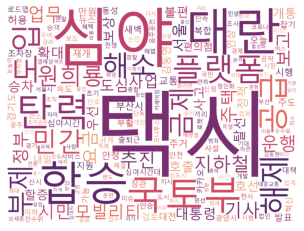

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=2000,height=1500).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

cats=[264,265,268,267] # 정치
ind=0 # 행 번호 
for cat in cats:  # 다중 포문
    for i in range(30): #range는 페이지 수
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        newslinks=[]
        
        for j, a in enumerate(links):
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) # 중복 기사 제거
            
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            news = bs2.find('div', id='dic_area').text
            news = re.sub('\n','',news) # 개행 공백으로
            news = re.sub('\t','',news) # tab 공백으로
            news_df.loc[ind] = [news,cat]
            ind += 1
news_df1